In [ ]:
'''
    This GPS model works by optimizing its least squares function 
to find the minimum error.  Since the least squares produces a line that 
minimizes the distance between the line and the points(minimizes error), it can 
be thought of as the objective function given by: 
GPSerror(x,y)=sqrt((x-x1)^2-(y-y1)^2).  This equation the uses the Pythagorean 
theorem to calculate the distance between a point on Earth and the satellite's 
position.  Then by subtracting the satellite's distance to point from the 
calculated distance to point, the point's coordinates can be accurately 
estimated, if enough satellites are used. Minimizing the GPS error function can 
essentially be considered an estimate for position, because the minimum of the 
total GPS error is the most likely position for some point on Earth.
    To minimize this function a “stumble down” method is used.  The stumble down 
method involves selecting random points from a box with an interval that is 
+/- a certain value of some initial point (P).  This new point (q), is then 
plugged into the GPS error function and the results are compared to the results 
of the GPS error function after plugging in point P.  If the results for q are 
smaller than the results for P, then P is set to equal q's (x,y) coordinates, 
and the process repeats.  If the results for q are larger than the results for 
P, then a new random point is selected and the process repeats.  After a certain
number of trials that P is not set to the new q value, the box's +/- interval 
can be shrunk.  If a certain number of trials that all result in a larger GPS 
error for by plugging in point q, then the box's interval is too large and the 
chances of randomly selecting a point that will result in a smaller GPS error 
are unlikely.  So by shrinking the box's interval around the point P, 
the function can be considered minimized after the box's interval is 
smaller than some tolerance, since the chances of landing on a point that 
results in a smaller GPS error become negligibly small once the box's 
interval is becomes negligibly small.  

'''

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
#GPS info
sat_loc = array([[412.5,257.7], [580,876], [438,750], [359.2,658.8]])
sat_pnt_d = array([251.6, 397, 270.5, 222.6])

In [30]:
#GPS error funciton
def GPSerror(x,y):
    GPS_err = sum((sqrt((x - sat_loc[:,0])**2 + (y - sat_loc[:,1])**2) - sat_pnt_d)**2)
    return GPS_err

In [37]:
#to use stumble down method inputs are:
# some_fun = function that you want to minimize
# first_pnt = the initial point that function will start at
# stepsize = how much it will shrink interval of guesses
# nfails = accuracy of results (higher number of fails = more accurate)
def stmbldwn_red(some_fun, first_pnt, stepsize, stepsize_redu, nfails):
    p_x, p_y = first_pnt[0], first_pnt[1]
    tol = 10e-8
    fail_count = 0
    num_steps = 0
    
        
    successListx = []
    successListy = []
    
    while True:
        num_steps += 1
        x_step = random.rand(1)*2.*stepsize - stepsize
        y_step = random.rand(1)*2.*stepsize - stepsize 
        fpxy = some_fun(p_x,p_y)
        q_x, q_y = p_x+x_step, p_y+y_step
        fqxy = some_fun(q_x,q_y)
        
        if fqxy < fpxy:
            p_x, p_y = q_x,q_y
            f_prev = fqxy
            successListx.append(q_x), successListy.append(q_y)
            #print q_x, q_y
            
        else:
            fail_count += 1
            if fail_count > nfails:
                stepsize = float(stepsize / stepsize_redu)
                fail_count = 0
        
        if stepsize < tol:
            break

    Xs, Ys = meshgrid(successListx,successListy)
    Zs = zeros(shape(Xs))
    rows, cols = shape(Xs)
    print rows,cols
    for i in range(rows):
        for j in range(cols):
            Zs[i,j] = some_fun(Xs[i,j], Ys[i,j])
    contour(Xs, Ys, Zs, colors='blue')
    plot(successListx, successListy, 'black')
    show()
    print "Minimum at:",p_x, p_y



854 854


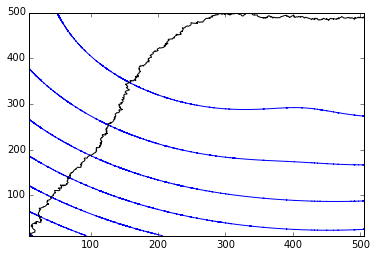

Minimum at: [ 504.73478126] [ 488.82705403]


In [38]:
stmbldwn_red(GPSerror, array([10,10]), 2, 1.0001, 7)